In [2]:
import numpy as np
import scipy
from scipy import signal
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import mutual_info_classif

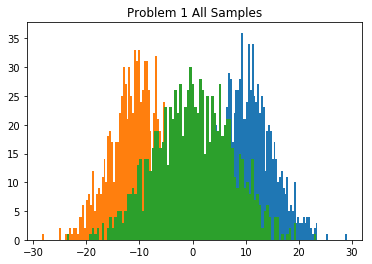

Mean: 0.110525769394
Variance: 52.425856078


In [3]:
#Problem #1
mu = 10
sigma = 5

gaussSample = scipy.random.normal(mu,sigma,1000)
gaussSample2 = scipy.random.normal(-mu,sigma,1000)
sumSample = np.add(gaussSample, gaussSample2)

plt.hist(gaussSample, 100)
plt.hist(gaussSample2, 100)
plt.hist(sumSample, 100)
plt.title("Problem 1 All Samples")
plt.show()

print("Mean:", sumSample.mean())
print("Variance:", sumSample.std()**2)

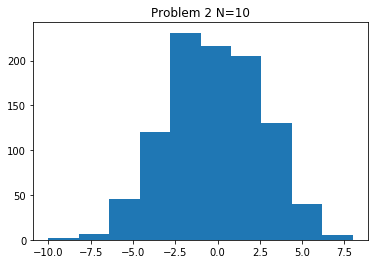

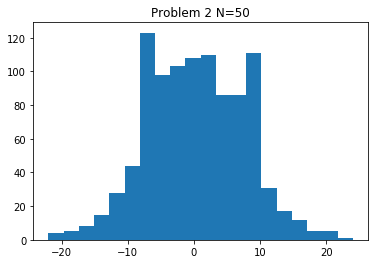

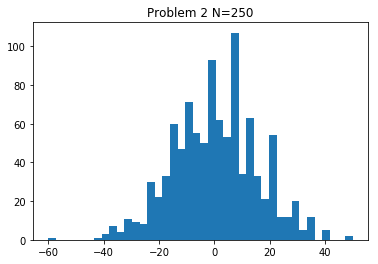

In [4]:
#Problem #2
T10 = [0] * 1000
T50 = [0] * 1000
T250 = [0] * 1000

for i in range(0,1000):
    Z10 = np.random.randint(2, size=10)

    for j in range(0,10): 
        if Z10[j] == 0: 
            Z10[j] = -1 
   # print(Z10)
    Z10n = np.sum(Z10) 

    T10[i] = Z10n
    
    Z50 = np.random.randint(2, size=50)

    for j in range(0,50): 
        if Z50[j] == 0: 
            Z50[j] = -1 
    Z50n = np.sum(Z50) 

    T50[i] = Z50n
    
    Z250 = np.random.randint(2, size=250)

    for j in range(0,250): 
        if Z250[j] == 0: 
            Z250[j] = -1 
    Z250n = np.sum(Z250) 

    T250[i] = Z250n

plt.hist(T10, 10)
plt.title("Problem 2 N=10")
plt.show()
plt.hist(T50, 20)
plt.title("Problem 2 N=50")
plt.show()
plt.hist(T250, 40)
plt.title("Problem 2 N=250")
plt.show()

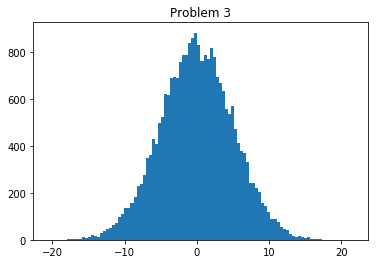

Mean: -0.00957068786663
Variance: 25.1782269498


In [5]:
#Problem #3
mu = 0
sigma = 5

gaussSample = scipy.random.normal(mu,sigma,25000)
plt.hist(gaussSample, 100)
plt.title("Problem 3")
plt.show()

mean = np.sum(gaussSample)/25000
print("Mean:", mean)
variance = np.sum((gaussSample - mean)**2)/25000
print("Variance:", variance)

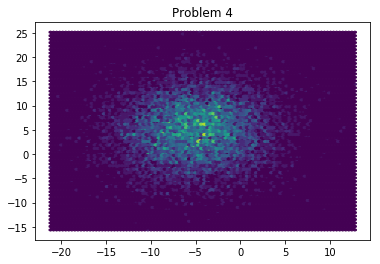

Mean: [[19.789723868350922, 0.79843335259521164], [0.79843335259521164, 29.493302000476746]]


In [13]:
#Problem #4
mean = [-5,5]
covariance =[[20, .8],
             [.8, 30]]

A = np.random.multivariate_normal(mean, covariance, 10000)
x,y = A.T

plt.hexbin(x,y)
plt.title("Problem 4")
plt.show()

Mean1 = np.sum(x)/10000
Mean2 = np.sum(y)/10000
meanR = [Mean1, Mean2]

Variance1 = np.sum((x - Mean1)**2)/10000
Variance2 = np.sum((y - Mean2)**2)/10000
Covariance = np.sum((x - Mean1)*(y - Mean2))/10000

meanR = [[Variance1,Covariance],[Covariance,Variance2]]

print("Mean:", meanR)


Part a:
Each row corresponds to one patient, so with, 452 rows there are 452 patients.
Each column corresponds to one feature, so there are 280 columns and features.


Part b:


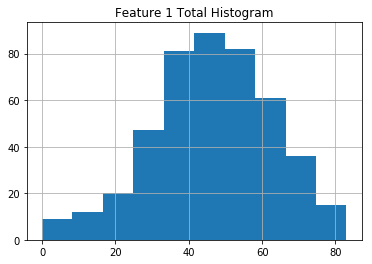

Feature 1 spans from 0-83 and is fairly normally distributed, so it most likely is Age


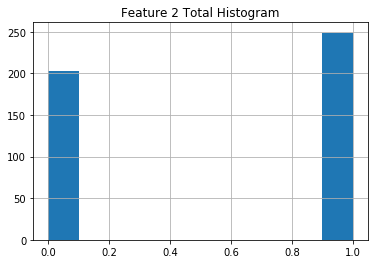

Feature 2 is a binary variable with fairly equal probability for either choice, so it most likely is Gender


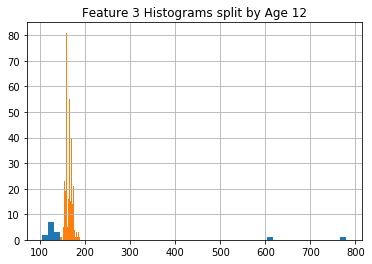

Average Trygliceride levels Ages <12:(excluding two outliers) 124.583333333
Average Trygliceride levels Ages >=12: 164.917808219
The two points at 608 and 780 for Ages <12 can be explained by the patients not fasting when the measurement was taken because triglyceride levels can spike to 5-10 times the normal level when fasting
Feature 3 averages around 124 for children and then 164 for teenagers and adults. This lines up with trygliceride levels where <150 mg/dL is expected for children and adults with borderline tryglicerides have around 150-200 mg/dL. Therefore, feature 3 is likely trygliceride levels in mg/dL


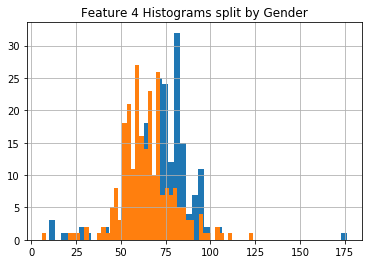

Male Average Weight(kg): 72.724137931
Female Average Weight(kg): 64.4578313253
Feature 4 when split into two data sets based on feature 1 shows that there's two distinct means, corresponding to the different genders. Those means also happen to be reasonably close to average weight in males and females, and the distributions are relatively normal. All things considered, feature 4 is most likely weight(kg).


Part d:
The way to test which features are strongly influence the patient condition is using multi-class classification techniques to score the features. Specifically to find the 3 most important features, we're using the Mutual Information Classifier provided by scikit, which works well with the fact that each condition is its own discrete classification. That classifier scores all of the features, and then the feature selector just chooses the top 3 scores.
The three most features according to the feature selector used are: [ 14 176 196]




In [16]:
#Problem 5
df = pd.read_csv('PatientData.csv', header=None, na_values='?')
rows = df.shape[0]
columns = df.shape[1]
#Part a
print("Part a:")
print("Each row corresponds to one patient, so with,", rows,"rows there are",rows, "patients.")
print("Each column corresponds to one feature, so there are", columns, "columns and features.")
print("\n")
#Part b
print("Part b:")
histAge = df[0].hist()
plt.title("Feature 1 Total Histogram")
plt.show()
print("Feature 1 spans from 0-83 and is fairly normally distributed, so it most likely is Age")
histGender = df[1].hist()
plt.title("Feature 2 Total Histogram")
plt.show()
print("Feature 2 is a binary variable with fairly equal probability for either choice, so it most likely is Gender")
df1 = df.sort_values(0)
dfL12 = df1[df1[0] < 12]
dfL12M = dfL12[dfL12[2] < 200]
dfG12 = df1[df1[0] >= 12]
histL12 = dfL12[2].hist(bins=50)
histG12 = dfG12[2].hist(bins=50)
plt.title("Feature 3 Histograms split by Age 12")
plt.show()
print("Average Trygliceride levels Ages <12:(excluding two outliers)", dfL12M.mean()[2])
print("Average Trygliceride levels Ages >=12:", dfG12.mean()[2])
print("The two points at 608 and 780 for Ages <12 can be explained by the patients not fasting when the measurement was taken because triglyceride levels can spike to 5-10 times the normal level when fasting")
print("Feature 3 averages around 124 for children and then 164 for teenagers and adults. This lines up with trygliceride levels where <150 mg/dL is expected for children and adults with borderline tryglicerides have around 150-200 mg/dL. Therefore, feature 3 is likely trygliceride levels in mg/dL")

df2 = df.sort_values(1)
dfM = df2[df2[1] == 0]
dfF = df2[df2[1] == 1]
histM = dfM[3].hist(bins=50)
histF = dfF[3].hist(bins=50)
plt.title("Feature 4 Histograms split by Gender")
plt.show()
print("Male Average Weight(kg):", dfM.mean()[3])
print("Female Average Weight(kg):", dfF.mean()[3])
print("Feature 4 when split into two data sets based on feature 1 shows that there's two distinct means, corresponding to the different genders. Those means also happen to be reasonably close to average weight in males and females, and the distributions are relatively normal. All things considered, feature 4 is most likely weight(kg).")
print("\n")

#Part c
df.fillna(df.mean(), inplace=True)

#Part d
print("Part d:")
print("The way to test which features are strongly influence the patient condition is using multi-class classification techniques to score the features. Specifically to find the 3 most important features, we're using the Mutual Information Classifier provided by scikit, which works well with the fact that each condition is its own discrete classification. That classifier scores all of the features, and then the feature selector just chooses the top 3 scores.")

X = df.iloc[:,0:279]
y = df[279]

selector = SelectKBest(mutual_info_classif, k=3)
selector.fit_transform(X,y)

print("The three most features according to the feature selector used are:",selector.get_support(indices=True))
print("\n")